# 函数初步

在讲解本节课的内容之前，我们先来研究一道数学题，请说出下面的方程有多少组正整数解。

$$
x_{1} + x_{2} + x_{3} + x_{4} = 8
$$

你可能已经想到了，这个问题其实等同于将 8 个苹果分成四组且每组至少一个苹果有多少种方案，也等价于在分隔 8 个苹果的 7 个间隙之间放入三个隔断将苹果分成四组有多少种方案，所以答案是 $\small{C_{7}^{3} = 35}$ ，其中 $\small{C_{7}^{3}}$ 代表 7 选 3 的组合数，其计算公式如下所示。

$$
C_m^n = \frac {m!} {n!(m-n)!}
$$

根据之前学习的知识，我们可以用循环做累乘的方式分别计算出 $\small{m!}$ 、 $\small{n!}$ 和 $\small{(m-n)!}$ ，然后再通过除法运算得到组合数 $\small{C_{m}^{n}}$ ，代码如下所示。

In [2]:
m=int(input('m='))
n=int(input('n='))
# 计算m！
a,b,c=1,1,1
result1=1
result2=1
result3=1
for _ in range(m):
    result1*=a
    a+=1
for _ in range(n):
    result2*=b
    b+=1
for _ in range(m-n):
    result3*=c
    c+=1
result=result1/(result2*result3)
print(result)


35.0


不知大家是否注意到，上面的代码中我们做了三次求阶乘的操作，虽然 
m
 、 
n
 、 
m
−
n
 的值各不相同，但是三段代码并没有实质性的区别，属于重复代码。世界级的编程大师Martin Fowler曾经说过：“代码有很多种坏味道，重复是最坏的一种！”。要写出高质量的代码，首先就要解决重复代码的问题。对于上面的代码来说，我们可以将求阶乘的功能封装到一个称为“函数”的代码块中，在需要计算阶乘的地方，我们只需“调用函数”即可实现对求阶乘功能的复用

## 定义函数

数学上的函数通常形如 $\small{y = f(x)}$ 或者 $\small{z = g(x, y)}$ 这样的形式，在 $\small{y = f(x)}$ 中， $\small{f}$ 是函数的名字， $\small{x}$ 是函数的自变量， $\small{y}$ 是函数的因变量；而在 $\small{z = g(x, y)}$ 中， $\small{g}$ 是函数名， $\small{x}$ 和 $\small{y}$ 是函数的自变量， $\small{z}$ 是函数的因变量。Python 中的函数跟这个结构是一致的，每个函数都有自己的名字、自变量和因变量。我们通常把 Python 函数的自变量称为函数的参数，而因变量称为函数的返回值。

Python 中可以使用`def`关键字来定义函数，和变量一样每个函数也应该有一个漂亮的名字，命名规则跟变量的命名规则是一样的（大家赶紧想想我们之前讲过的变量的命名规则）。在函数名后面的圆括号中可以设置函数的参数，也就是我们刚才说的函数的自变量，而函数执行完成后，我们会通过`return`关键字来返回函数的执行结果，这就是我们刚才说的函数的因变量。如果函数中没有`return`语句，那么函数会返回代表空值的`None`。另外，函数也可以没有自变量（参数），但是函数名后面的圆括号是必须有的。一个函数要做的事情（要执行的代码），是通过代码缩进的方式放到函数定义行之后，跟之前分支和循环结构的代码块类似，如下图所示。
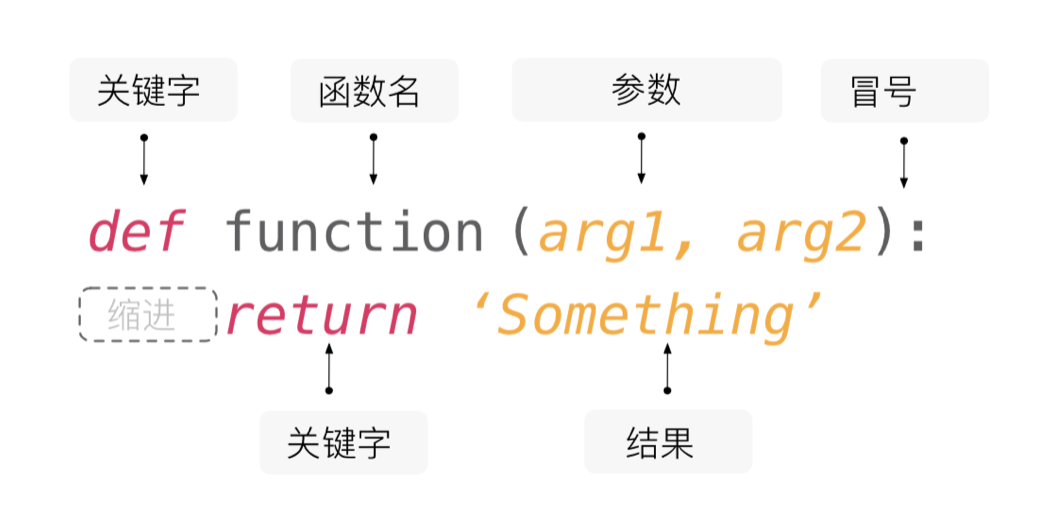

下面，我们将之前代码中求阶乘的操作放到一个函数中，通过这种方式来重构上面的代码。**所谓重构，是在不影响代码执行结果的前提下对代码的结构进行调整**，重构之后的代码如下所示。


In [8]:
def j(num):
    result=1
    for i in range(2,num+1):
        result*=i
    return result

m=int(input('m='))
n=int(input('n='))
a=j(m)/(j(n)*j(m-n))
print(a)

35.0


大家可以感受下，上面的代码是不是比之前的版本更加简单优雅。更为重要的是，我们定义的求阶乘函数fac还可以在其他需要求阶乘的代码中重复使用。所以，使用函数可以帮助我们将功能上相对独立且会被重复使用的代码封装起来，当我们需要这些的代码，不是把重复的代码再编写一遍，而是通过调用函数实现对既有代码的复用。事实上，Python 标准库的math模块中，已经有一个名为factorial的函数实现了求阶乘的功能，我们可以直接用import math导入math模块，然后使用math.factorial来调用求阶乘的函数；我们也可以通过from math import factorial直接导入factorial函数来使用它，代码如下所示。

In [ ]:
from math import factorial

m = int(input('m = '))
n = int(input('n = '))
print(factorial(m) // factorial(n) // factorial(m - n))


将来我们使用的函数，要么是自定义的函数，要么是 Python 标准库或者三方库中提供的函数，如果已经有现成的可用的函数，我们就没有必要自己去定义，“重复发明轮子”是一件非常糟糕的事情。对于上面的代码，如果你觉得factorial这个名字太长，书写代码的时候不是特别方便，我们在导入函数的时候还可以通过as关键字为其别名。在调用函数的时候，我们可以用函数的别名，而不再使用它之前的名字，代码如下所示。

In [ ]:
from math import factorial as f

m = int(input('m = '))
n = int(input('n = '))
print(f(m) // f(n) // f(m - n))

## 函数参数

### 位置参数和关键字参数

我们再来写一个函数，根据给出的三条边的长度判断是否可以构成三角形，如果可以构成三角形则返回True，否则返回False，代码如下所示。

In [ ]:
def make_judgement(a, b, c):
    """判断三条边的长度能否构成三角形"""
    return a + b > c and b + c > a and a + c > b

上面make_judgement函数有三个参数，这种参数叫做位置参数，在调用函数时通常按照从左到右的顺序依次传入，而且传入参数的数量必须和定义函数时参数的数量相同，如下所示。

In [ ]:
print(make_judgement(1, 2, 3))  # False
print(make_judgement(4, 5, 6))  # True

如果不想按照从左到右的顺序依次给出a、b、c 三个参数的值，也可以使用关键字参数，通过“参数名=参数值”的形式为函数传入参数，如下所示。

In [ ]:
print(make_judgement(b=2, c=3, a=1))  # False
print(make_judgement(c=6, b=4, a=5))  # True

在定义函数时，我们可以在参数列表中用/设置强制位置参数（positional-only arguments），用*设置命名关键字参数。所谓强制位置参数，就是调用函数时只能按照参数位置来接收参数值的参数；而命名关键字参数只能通过“参数名=参数值”的方式来传递和接收参数，大家可以看看下面的例子。

In [ ]:
# /前面的参数是强制位置参数
def make_judgement(a, b, c, /):
    """判断三条边的长度能否构成三角形"""
    return a + b > c and b + c > a and a + c > b


# 下面的代码会产生TypeError错误，错误信息提示“强制位置参数是不允许给出参数名的”
# TypeError: make_judgement() got some positional-only arguments passed as keyword arguments
# print(make_judgement(b=2, c=3, a=1))

In [ ]:
# *后面的参数是命名关键字参数
def make_judgement(*, a, b, c):
    """判断三条边的长度能否构成三角形"""
    return a + b > c and b + c > a and a + c > b


# 下面的代码会产生TypeError错误，错误信息提示“函数没有位置参数但却给了3个位置参数”
# TypeError: make_judgement() takes 0 positional arguments but 3 were given
# print(make_judgement(1, 2, 3))

### 参数的默认值

Python 中允许函数的参数拥有默认值，我们可以把之前讲过的一个例子“CRAPS赌博游戏”（《第07课：分支和循环结构的应用》）中摇色子获得点数的功能封装到函数中，代码如下所示。

In [ ]:
from random import randrange


# 定义摇色子的函数
# 函数的自变量（参数）n表示色子的个数，默认值为2
# 函数的因变量（返回值）表示摇n颗色子得到的点数
def roll_dice(n=2):
    total = 0
    for _ in range(n):
        total += randrange(1, 7)
    return total


# 如果没有指定参数，那么n使用默认值2，表示摇两颗色子
print(roll_dice())
# 传入参数3，变量n被赋值为3，表示摇三颗色子获得点数
print(roll_dice(3))

我们再来看一个更为简单的例子。

In [ ]:
def add(a=0, b=0, c=0):
    """三个数相加求和"""
    return a + b + c


# 调用add函数，没有传入参数，那么a、b、c都使用默认值0
print(add())         # 0
# 调用add函数，传入一个参数，该参数赋值给变量a, 变量b和c使用默认值0
print(add(1))        # 1
# 调用add函数，传入两个参数，分别赋值给变量a和b，变量c使用默认值0
print(add(1, 2))     # 3
# 调用add函数，传入三个参数，分别赋值给a、b、c三个变量
print(add(1, 2, 3))  # 6


需要注意的是，带默认值的参数必须放在不带默认值的参数之后，否则将产生SyntaxError错误，错误消息是：non-default argument follows default argument，翻译成中文的意思是“没有默认值的参数放在了带默认值的参数后面”。

### 可变参数

Python 语言中可以通过星号表达式语法让函数支持可变参数。所谓可变参数指的是在调用函数时，可以向函数传入0个或任意多个参数。将来我们以团队协作的方式开发商业项目时，很有可能要设计函数给其他人使用，但有的时候我们并不知道函数的调用者会向该函数传入多少个参数，这个时候可变参数就能派上用场。

下面的代码演示了如何使用可变位置参数实现对任意多个数求和的add函数，调用函数时传入的参数会保存到一个元组，通过对该元组的遍历，可以获取传入函数的参数。

In [ ]:
# 用星号表达式来表示args可以接收0个或任意多个参数
# 调用函数时传入的n个参数会组装成一个n元组赋给args
# 如果一个参数都没有传入，那么args会是一个空元组
def add(*args):
    total = 0
    # 对保存可变参数的元组进行循环遍历
    for val in args:
        # 对参数进行了类型检查（数值型的才能求和）
        if type(val) in (int, float):
            total += val
    return total


# 在调用add函数时可以传入0个或任意多个参数
print(add())         # 0
print(add(1))        # 1
print(add(1, 2, 3))  # 6
print(add(1, 2, 'hello', 3.45, 6))  # 12.45

如果我们希望通过“参数名=参数值”的形式传入若干个参数，具体有多少个参数也是不确定的，我们还可以给函数添加可变关键字参数，把传入的关键字参数组装到一个字典中，代码如下所示。

In [1]:
# 参数列表中的**kwargs可以接收0个或任意多个关键字参数
# 调用函数时传入的关键字参数会组装成一个字典（参数名是字典中的键，参数值是字典中的值）
# 如果一个关键字参数都没有传入，那么kwargs会是一个空字典
def foo(*args, **kwargs):
    print(args)
    print(kwargs)


foo(3, 2.1, True, name='骆昊', age=43, gpa=4.95)

(3, 2.1, True)
{'name': '骆昊', 'age': 43, 'gpa': 4.95}


### 用模块管理函数

不管用什么样的编程语言来写代码，给变量、函数起名字都是一个让人头疼的问题，因为我们会遇到命名冲突这种尴尬的情况。最简单的场景就是在同一个.py文件中定义了两个同名的函数，如下所示。

In [11]:
def foo():
    print('hello, world!')


def foo():
    print('goodbye, world!')

    
foo()  # 大家猜猜调用foo函数会输出什么

goodbye, world!


当然上面的这种情况我们很容易就能避免，但是如果项目是团队协作多人开发的时候，团队中可能有多个程序员都定义了名为foo的函数，这种情况下怎么解决命名冲突呢？答案其实很简单，Python 中每个文件就代表了一个模块（module），我们在不同的模块中可以有同名的函数，在使用函数的时候，我们通过import关键字导入指定的模块再使用完全限定名（模块名.函数名）的调用方式，就可以区分到底要使用的是哪个模块中的foo函数，代码如下所示。

`module1.py`

```python
def foo():
    print('hello, world!')
```

`module2.py`

```python
def foo():
    print('goodbye, world!')
```

`test.py`

```python
import module1
import module2

# 用“模块名.函数名”的方式（完全限定名）调用函数，
module1.foo()  # hello, world!
module2.foo()  # goodbye, world!
```

在导入模块时，还可以使用`as`关键字对模块进行别名，这样我们可以使用更为简短的完全限定名。



`test.py`

```python
import module1 as m1
import module2 as m2

m1.foo()  # hello, world!
m2.foo()  # goodbye, world!
```


上面两段代码，我们导入的是定义函数的模块，我们也可以使用`from...import...`语法从模块中直接导入需要使用的函数，代码如下所示。

`test.py`

```python
from module1 import foo

foo()  # hello, world!

from module2 import foo

foo()  # goodbye, world!
```

但是，如果我们如果从两个不同的模块中导入了同名的函数，后面导入的函数会替换掉之前的导入，就像下面的代码，调用`foo`会输出`goodbye, world!`，因为我们先导入了`module1`的`foo`，后导入了`module2`的`foo` 。如果两个`from...import...`反过来写，那就是另外一番光景了。

`test.py`

```python
from module1 import foo
from module2 import foo

foo()  # goodbye, world!
```

如果想在上面的代码中同时使用来自两个模块的`foo`函数还是有办法的，大家可能已经猜到了，还是用`as`关键字对导入的函数进行别名，代码如下所示。

`test.py`

```python
from module1 import foo as f1
from module2 import foo as f2

f1()  # hello, world!
f2()  # goodbye, world!
```

## 标准库中的模块和函数


Python 标准库中提供了大量的模块和函数来简化我们的开发工作，我们之前用过的`random`模块就为我们提供了生成随机数和进行随机抽样的函数；而`time`模块则提供了和时间操作相关的函数；我们之前用到过的`math`模块中还包括了计算正弦、余弦、指数、对数等一系列的数学函数。随着我们深入学习 Python 语言，我们还会用到更多的模块和函数。

Python 标准库中还有一类函数是不需要`import`就能够直接使用的，我们将其称之为**内置函数**，这些内置函数不仅有用而且还很常用，下面的表格列出了一部分的内置函数。

| 函数    | 说明                                                         |
| ------- | ------------------------------------------------------------ |
| `abs`   | 返回一个数的绝对值，例如：`abs(-1.3)`会返回`1.3`。           |
| `bin`   | 把一个整数转换成以`'0b'`开头的二进制字符串，例如：`bin(123)`会返回`'0b1111011'`。 |
| `chr`   | 将Unicode编码转换成对应的字符，例如：`chr(8364)`会返回`'€'`。 |
| `hex`   | 将一个整数转换成以`'0x'`开头的十六进制字符串，例如：`hex(123)`会返回`'0x7b'`。 |
| `input` | 从输入中读取一行，返回读到的字符串。                         |
| `len`   | 获取字符串、列表等的长度。                                   |
| `max`   | 返回多个参数或一个可迭代对象中的最大值，例如：`max(12, 95, 37)`会返回`95`。 |
| `min`   | 返回多个参数或一个可迭代对象中的最小值，例如：`min(12, 95, 37)`会返回`12`。 |
| `oct`   | 把一个整数转换成以`'0o'`开头的八进制字符串，例如：`oct(123)`会返回`'0o173'`。 |
| `open`  | 打开一个文件并返回文件对象。                                 |
| `ord`   | 将字符转换成对应的Unicode编码，例如：`ord('€')`会返回`8364`。 |
| `pow`   | 求幂运算，例如：`pow(2, 3)`会返回`8`；`pow(2, 0.5)`会返回`1.4142135623730951`。 |
| `print` | 打印输出。                                                   |
| `range` | 构造一个范围序列，例如：`range(100)`会产生`0`到`99`的整数序列。 |
| `round` | 按照指定的精度对数值进行四舍五入，例如：`round(1.23456, 4)`会返回`1.2346`。 |
| `sum`   | 对一个序列中的项从左到右进行求和运算，例如：`sum(range(1, 101))`会返回`5050`。 |
| `type`  | 返回对象的类型，例如：`type(10)`会返回`int`；而` type('hello')`会返回`str`。 |